In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [91]:
df=pd.read_csv('indian_liver_patient_dataset.csv')
df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age        583 non-null int64
gender     583 non-null object
TB         583 non-null float64
DB         583 non-null float64
alkphos    583 non-null int64
sgpt       583 non-null int64
sgot       583 non-null int64
TP         583 non-null float64
ALB        583 non-null float64
A_G        583 non-null float64
class      583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
TB,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
DB,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
alkphos,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
sgpt,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
sgot,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
TP,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
ALB,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
A_G,583.0,-685.165780,8261.856000,-100000.0,0.7,0.92,1.1,2.8
class,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [7]:
df.columns


Index(['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB',
       'A_G', 'class'],
      dtype='object')

In [8]:
df.isna().sum()

age        0
gender     0
TB         0
DB         0
alkphos    0
sgpt       0
sgot       0
TP         0
ALB        0
A_G        0
class      0
dtype: int64

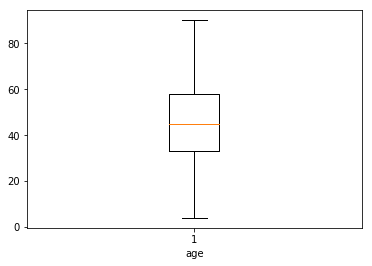

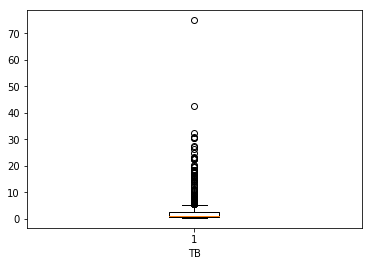

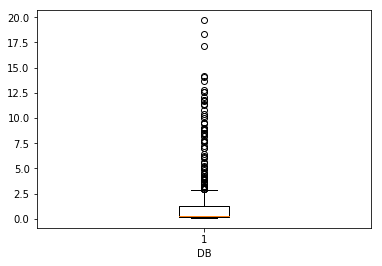

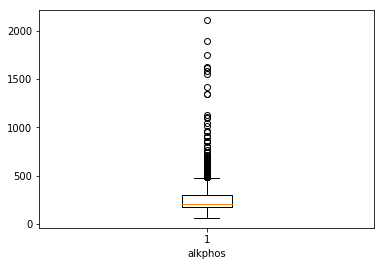

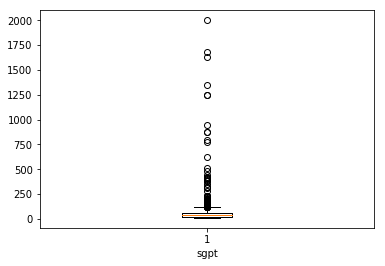

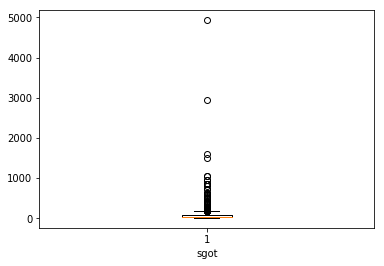

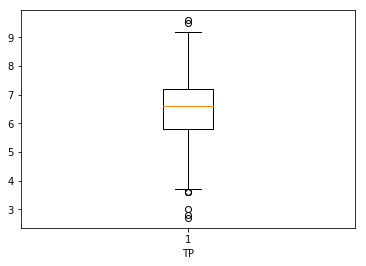

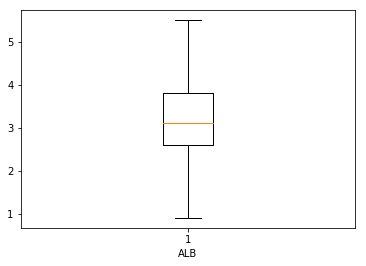

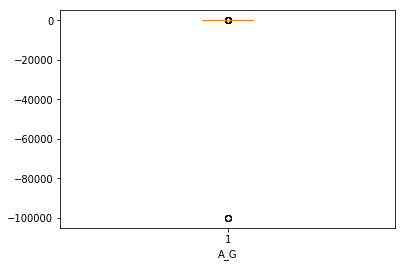

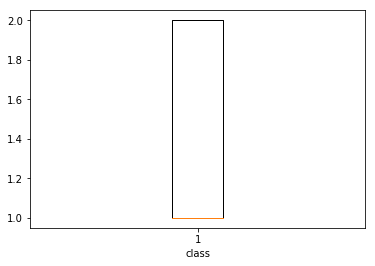

In [49]:
# for col in df.columns:
#     if df[col].dtype in ['int64','float64']:
#         plt.figure()
#         plt.boxplot(df[col])
#         plt.xlabel(col)

In [50]:
df.shape

(583, 11)

In [51]:
#Outlier Removal
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        Q1,Q3=df[col].quantile([.25,.75])
        IQR=Q3-Q1
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        df=df[df[col]>lower]
        df=df[df[col]<upper]
    

In [52]:
df.shape

(327, 11)

In [53]:
df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.0,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1


In [92]:
# MINMAX SCALER:
# scaler = MinMaxScaler()
# df=scaler.fit_transform(df)
# df=pd.DataFrame(df)
scaler = MinMaxScaler()
for col in df.columns[:-1]:
    if df[col].dtype in ['int64','float64']:
#         scaler.fit(df[[col]])
        df[col]=scaler.fit_transform(df[[col]])


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [55]:
df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,0.753086,Female,0.08,0.000000,0.349296,0.086957,0.123077,0.547170,0.463415,0.389313,1
3,0.666667,Male,0.20,0.230769,0.335211,0.057971,0.153846,0.547170,0.487805,0.465649,1
5,0.518519,Male,0.52,0.461538,0.408451,0.130435,0.061538,0.698113,0.731707,0.694656,1
6,0.271605,Female,0.16,0.076923,0.256338,0.086957,0.030769,0.584906,0.512195,0.465649,1
7,0.308642,Female,0.16,0.153846,0.391549,0.057971,0.015385,0.528302,0.536585,0.541985,1


In [93]:
df.corr()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254
class,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000


In [57]:
df.cov()


,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,0.043293,0.005188,0.005019,-0.002220,-0.002600,-0.003335,-0.009288,-0.009808,-0.007432,-0.013046
TB,0.005188,0.041689,0.043307,0.006625,0.010501,0.012951,-0.001631,-0.003114,-0.004820,-0.015268
DB,0.005019,0.043307,0.050658,0.005797,0.008228,0.013115,-0.000664,-0.002927,-0.005426,-0.015204
alkphos,-0.002220,0.006625,0.005797,0.030385,0.006798,0.009787,0.001598,-0.000998,-0.004967,-0.006675
sgpt,-0.002600,0.010501,0.008228,0.006798,0.038224,0.024063,0.000827,0.002195,0.002324,-0.011454
sgot,-0.003335,0.012951,0.013115,0.009787,0.024063,0.049561,-0.002226,-0.002803,-0.002957,-0.015350
TP,-0.009288,-0.001631,-0.000664,0.001598,0.000827,-0.002226,0.037719,0.029996,0.011580,0.001292
ALB,-0.009808,-0.003114,-0.002927,-0.000998,0.002195,-0.002803,0.029996,0.032578,0.026281,0.005070
A_G,-0.007432,-0.004820,-0.005426,-0.004967,0.002324,-0.002957,0.011580,0.026281,0.039036,0.005114
class,-0.013046,-0.015268,-0.015204,-0.006675,-0.011454,-0.015350,0.001292,0.005070,0.005114,0.242040


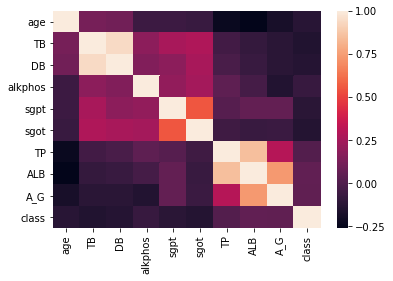

In [19]:
sns.heatmap(df.corr())

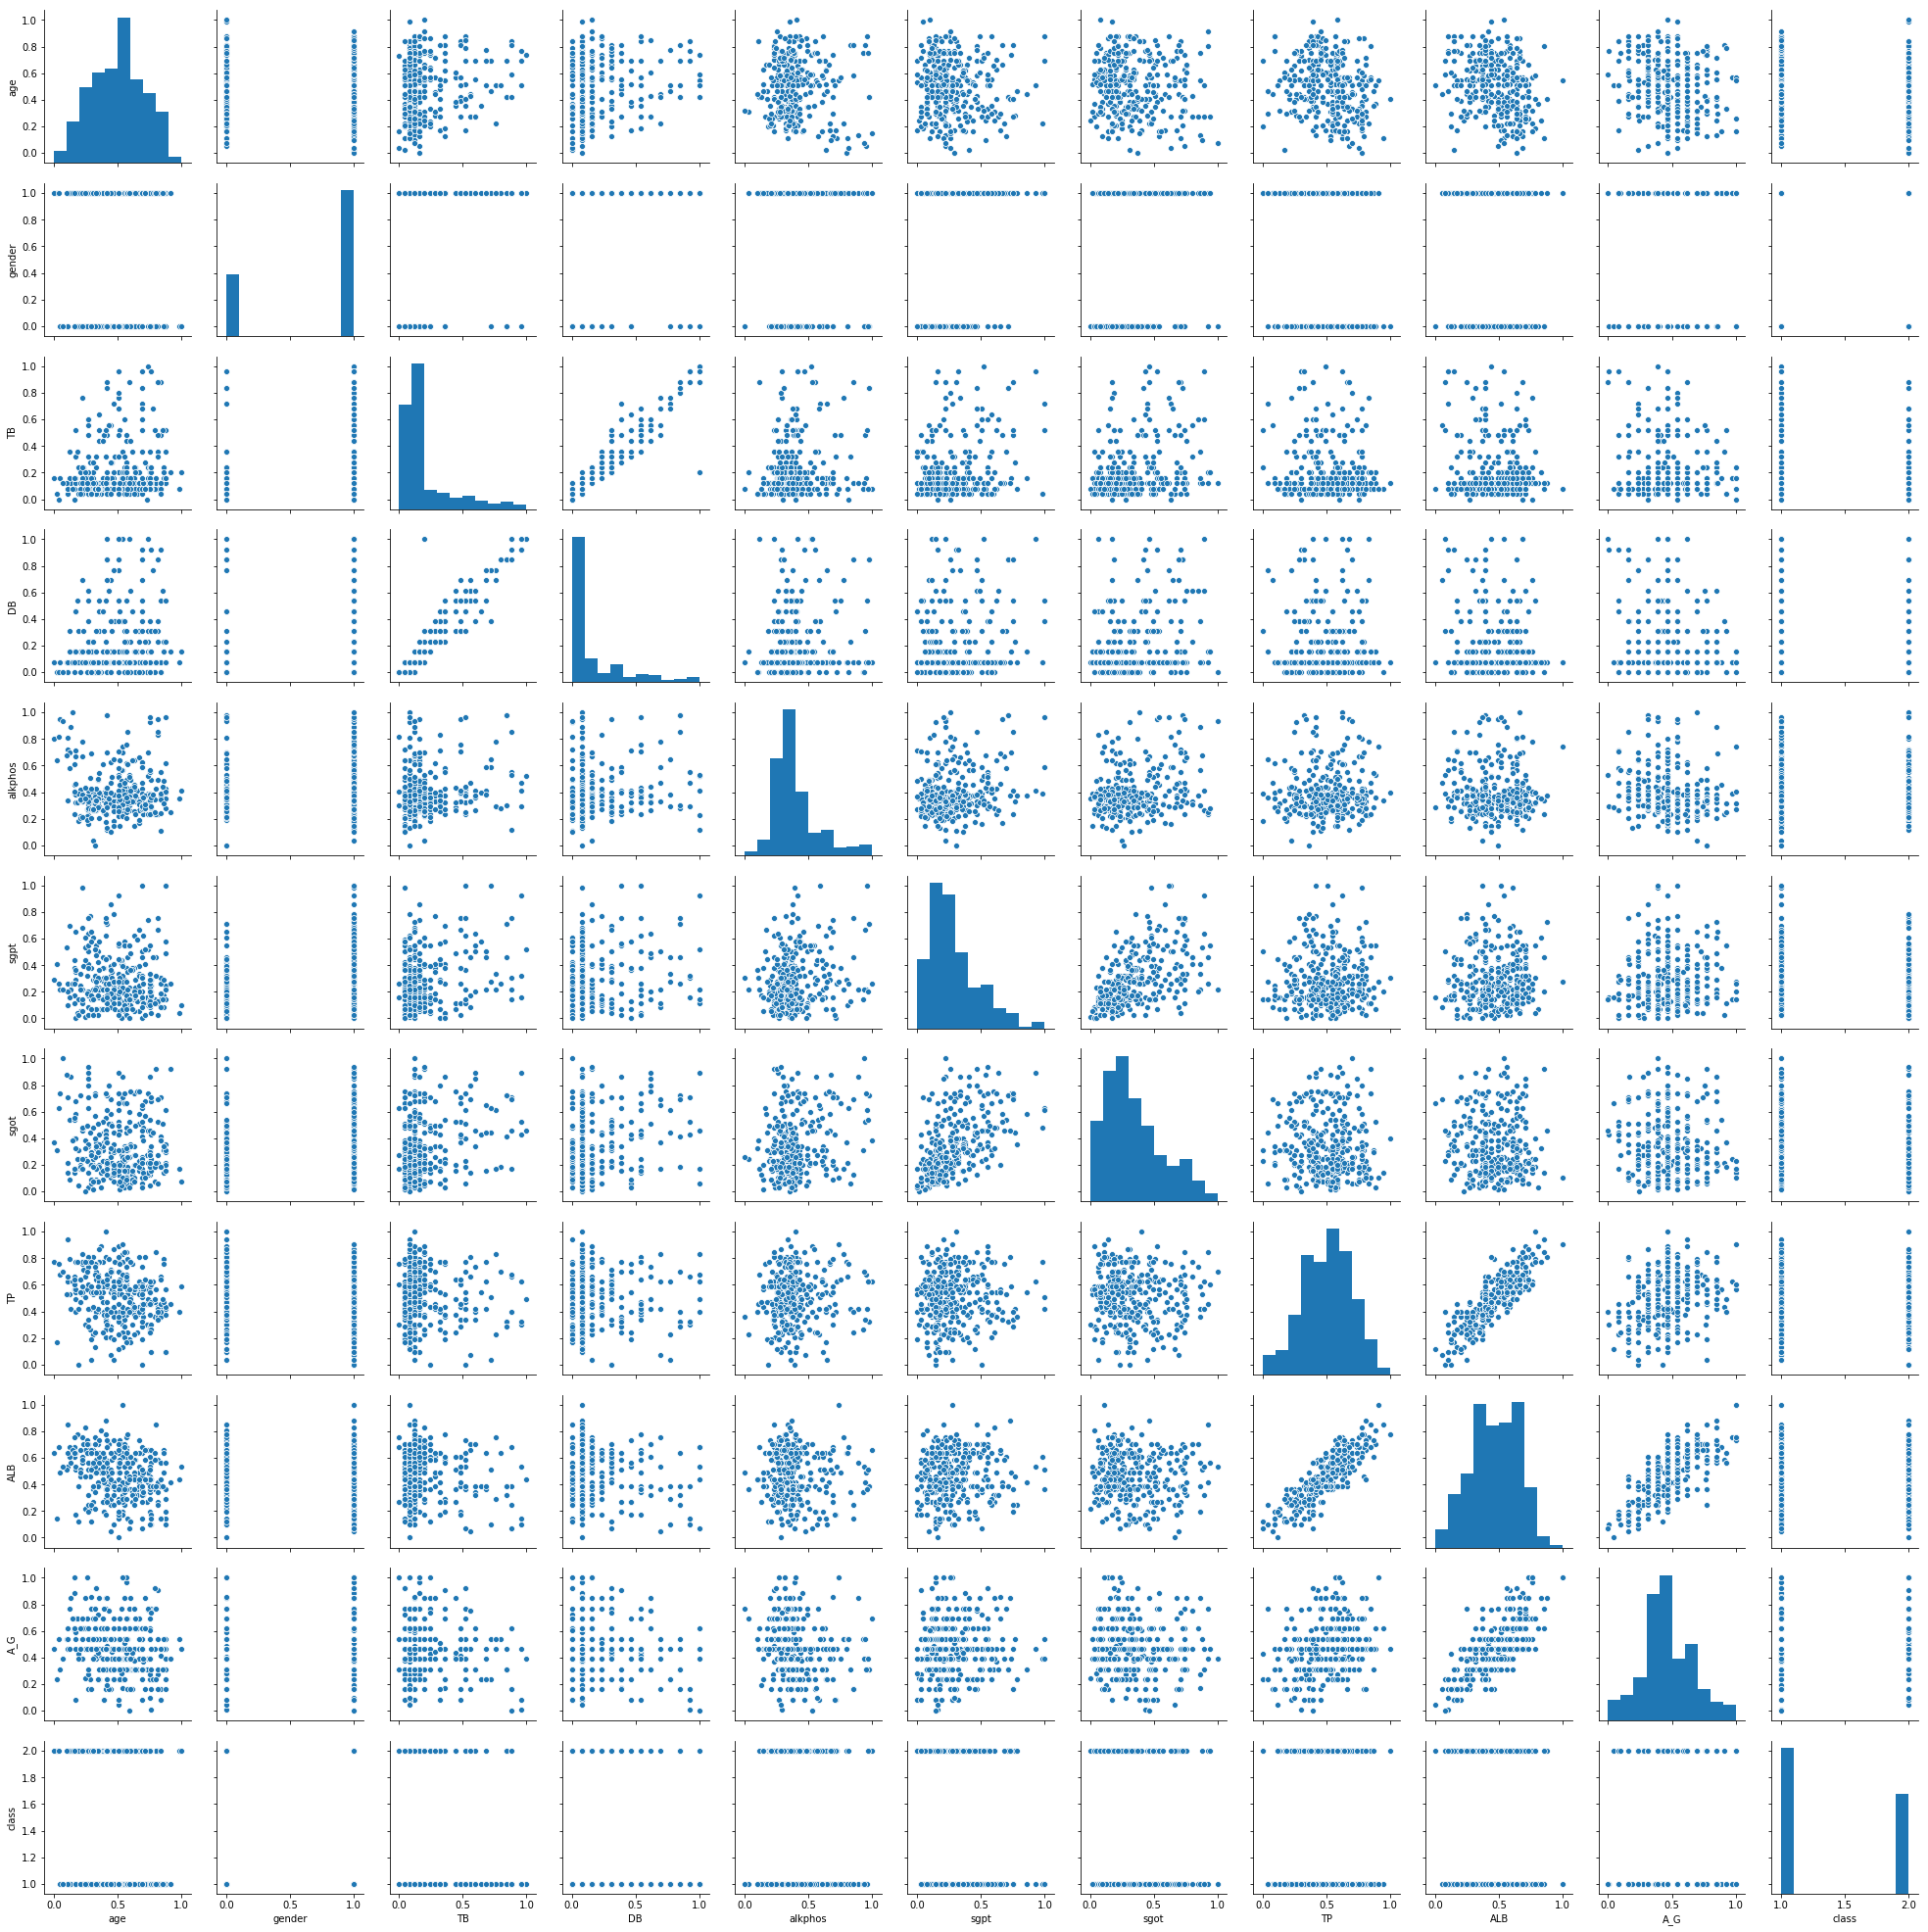

In [33]:
sns.pairplot(df)

In [58]:
#Encoding

# df_encoded=pd.get_dummies(df['gender'])
# df_encoded['gender']=df['gender']
# df.head()
# df_encoded.columns
# df_encoded
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df['gender'].unique()

array([0, 1], dtype=int64)

In [60]:
df


,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,0.753086,0,0.08,0.000000,0.349296,0.086957,0.123077,0.547170,0.463415,0.389313,1
3,0.666667,1,0.20,0.230769,0.335211,0.057971,0.153846,0.547170,0.487805,0.465649,1
5,0.518519,1,0.52,0.461538,0.408451,0.130435,0.061538,0.698113,0.731707,0.694656,1
6,0.271605,0,0.16,0.076923,0.256338,0.086957,0.030769,0.584906,0.512195,0.465649,1
7,0.308642,0,0.16,0.153846,0.391549,0.057971,0.015385,0.528302,0.536585,0.541985,1
8,0.160494,1,0.16,0.153846,0.391549,0.173913,0.138462,0.660377,0.658537,0.618321,2
9,0.629630,1,0.08,0.076923,0.639437,0.623188,0.738462,0.547170,0.487805,0.465649,1
10,0.654321,1,0.04,0.000000,0.414085,0.594203,0.753846,0.377358,0.317073,0.312977,1
11,0.839506,1,0.88,0.923077,0.554930,0.304348,0.707692,0.660377,0.390244,0.160305,1
12,0.740741,1,0.16,0.153846,0.695775,0.739130,0.738462,0.584906,0.487805,0.389313,2


In [94]:
#Model spliting 
from sklearn.model_selection import train_test_split


In [95]:
df_train,df_test=train_test_split(df,test_size=0.20)


In [96]:
df_train.shape,df_test.shape

((466, 11), (117, 11))

#Logistic Rergression 

In [104]:
from sklearn.linear_model import LogisticRegression


In [105]:
model=LogisticRegression()
features=df_train[['TB','sgpt','TP','A_G']]
target=df_train[['class']]
model.fit(features,target)
print("Intercept:",model.intercept_,"\nCoefficients:",model.coef_)

Intercept: [-0.3711807] 
Coefficients: [[-2.43515091 -1.73042222  0.33371934 -0.573861  ]]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
# model.score(fearures,target)

In [107]:
train_acc=model.score(features,target)
test_acc=model.score(features,target)
print(train_acc,test_acc)


0.7103004291845494 0.7103004291845494


In [ ]:
#Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
features1=df_train[['TB','sgpt','TP','A_G']]
target1=df_train[['class']]
model.fit(features1,target1)
# 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
train_ac=model.score(features1,target1)
test_ac=model.score(features1,target1)
print(train_ac,test_ac)

1.0 1.0


#KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
features2=df_train[['TB','sgpt','TP','A_G']]
target2=df_train[['class']]
model.fit(features2,target2)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [103]:
train_ac=model.score(features2,target2)
test_ac=model.score(features2,target2)
print(train_ac,test_ac)

0.8004291845493562 0.8004291845493562


#SVM

In [120]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
features3=df_train[['TB','sgpt','TP','A_G']]
target3=df_train[['class']]
model.fit(features3,target3)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [121]:
train_a=model.score(features3,target3)
test_a=model.score(features3,target3)
print(train_a,test_a)

0.7103004291845494 0.7103004291845494
